In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import pickle

from matplotlib.pyplot import figure

figsize=(10, 6)

In [92]:
columns = [
    'AGENT_ID',
    'NTH_EPISODE',
    'STEPS_TAKEN',
    'TOTAL_REWARD',
    'MOVING_AVERAGE_REWARD',
    'SOLVED',
]

path, dirs, files = next(os.walk("./data"))
n_agents_ddpg = len(files)

print(n_agents_ddpg)
ddpg_agent_dfs = []
for agent_id in range(n_agents_ddpg):
    ddpg_agent_dfs.append(pd.read_pickle('./data/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved_ddpg = []
not_solved_ddpg = []
for agent_id in range(n_agents_ddpg):
    if ddpg_agent_dfs[agent_id][ddpg_agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved_ddpg.append(agent_id)
    else:
        solved_ddpg.append(agent_id)

number_solved = len(solved_ddpg)

percentage_solved_ddpg = (number_solved/n_agents_ddpg)*100

print("{}% Solved".format(percentage_solved_ddpg))

20
90.0% Solved


In [93]:
path, dirs, files = next(os.walk("./data_initial_test"))
n_agents_per = len(files)

print(n_agents_per)
per_agent_dfs = []
for agent_id in range(n_agents_per):
    per_agent_dfs.append(pd.read_pickle('./data_initial_test/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved_per = []
not_solved_per = []
for agent_id in range(n_agents_per):
    if per_agent_dfs[agent_id][per_agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved_per.append(agent_id)
    else:
        solved_per.append(agent_id)

number_solved = len(solved_per)

percentage_solved_per = (number_solved/n_agents_per)*100

print("{}% Solved".format(percentage_solved_per))

5
60.0% Solved


2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19


,TOTAL_REWARD,TOTAL_REWARD2,TOTAL_REWARD3,TOTAL_REWARD4,TOTAL_REWARD5,TOTAL_REWARD7,TOTAL_REWARD8,TOTAL_REWARD9,TOTAL_REWARD10,TOTAL_REWARD11,TOTAL_REWARD12,TOTAL_REWARD13,TOTAL_REWARD14,TOTAL_REWARD15,TOTAL_REWARD16,TOTAL_REWARD17,TOTAL_REWARD18,TOTAL_REWARD19,mean_total_reward
0,-24.388650,-25.457782,-24.671381,-25.517711,-25.279038,-24.949479,-25.208161,-24.822815,-24.592167,-23.927985,-24.873087,-25.095080,-25.239610,-24.784854,-24.545611,-25.832910,-25.169113,-25.613231,-24.998259
1,-40.431373,-47.965262,-51.582320,-51.581515,70.219076,-39.633412,48.900670,-43.095584,-51.582179,-45.144568,-62.499582,-56.594834,-37.907337,-51.582301,-41.409625,-29.712521,73.519879,-59.734571,-28.767631
2,-83.944111,-87.435498,-99.994675,-93.029084,-85.386006,-87.254219,-81.258207,-84.789450,-95.032211,-84.986790,63.749184,46.335444,62.276176,-99.994675,-85.237408,-72.908798,-90.555348,-59.245694,-62.149520
3,-24.588460,-23.427977,-66.152708,88.080158,-76.625301,-26.799188,-26.214647,-58.092659,81.303762,-26.558298,84.930536,-53.061459,79.209854,-74.273527,85.971634,-74.273545,65.001994,-52.879263,-5.469394
4,-55.596383,-73.913993,-94.463512,-80.316160,-79.301825,-57.901318,-70.123615,-86.573146,50.174696,-64.329411,-37.003082,77.523818,61.948216,-90.387659,58.009649,-90.387665,82.863935,69.677707,-26.672208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-18.694158,94.188910,93.539924,93.449772,93.827429,93.514296,93.757128,94.005591,93.440168,90.772663,90.042846,94.176289,93.820306,77.846958,93.450477,93.480142,93.320720,94.046165,86.221424
246,-34.257685,93.953788,94.648961,93.571871,93.569820,85.480557,94.044724,89.007645,94.281017,94.024403,94.201350,93.445925,93.407234,95.473436,94.802717,93.684120,93.799192,93.895636,86.168595
247,-70.683210,93.322369,75.069498,89.450101,93.846069,92.694231,93.717550,93.648797,93.287796,93.898503,93.941129,94.023410,76.993762,94.239315,93.580780,94.181609,93.919383,93.754796,82.382549
248,86.682716,93.983501,93.780956,94.045954,93.362583,88.769216,93.440230,93.847696,93.593551,94.149562,93.248600,74.048450,89.527395,93.856847,93.569693,93.310297,93.537177,93.731704,91.693674


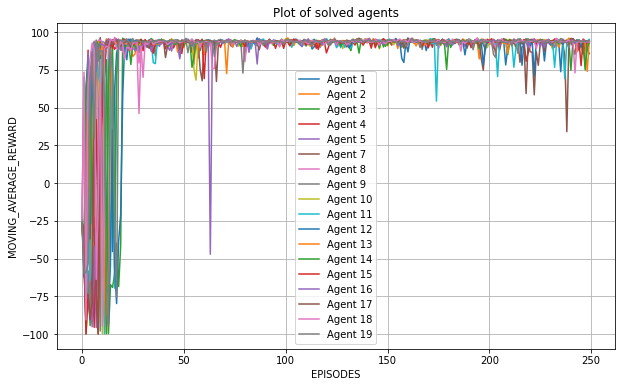

In [94]:
for agent_id in solved_ddpg:
    ax = ddpg_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of solved agents"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

df = ddpg_agent_dfs[0]['TOTAL_REWARD']
ddpg_df = pd.DataFrame(df)

for agent_id in solved_ddpg[1:]:
    print(agent_id)
    name = 'TOTAL_REWARD' + str(agent_id)
    ddpg_df[name] = pd.DataFrame(ddpg_agent_dfs[agent_id]['TOTAL_REWARD'])

ddpg_df['mean_total_reward'] = ddpg_df.mean(axis=1)
ddpg_df

,TOTAL_REWARD
0,-24.271861
1,-51.581355
2,89.884959
3,-66.628231
4,-73.416946
...,...
245,93.799377
246,93.736437
247,78.011061
248,89.985747


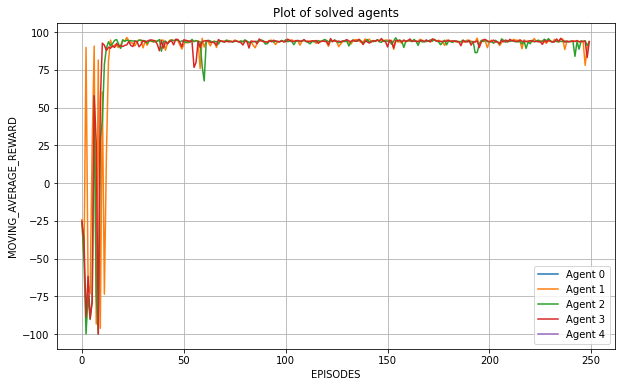

In [110]:
for agent_id in range(n_agents_per):
    ax = per_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of solved agents"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

df = per_agent_dfs[1]['TOTAL_REWARD']
per_df = pd.DataFrame(df)

per_df

In [113]:
for agent_id in range(2,n_agents_per-1):
    print(agent_id)
    name = 'TOTAL_REWARD' + str(agent_id)
    per_df[name] = pd.DataFrame(per_agent_dfs[agent_id]['TOTAL_REWARD'])
per_df['mean_total_reward'] = per_df.mean(axis=1)

2
3


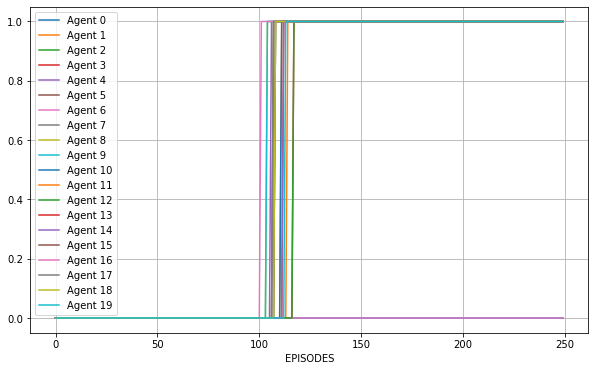

In [96]:
for agent_id in range(n_agents_ddpg):
    ax = ddpg_agent_dfs[agent_id]['SOLVED'].plot(
        label = "Agent " + str(agent_id),
        legend = True,
        figsize=figsize,
        grid = True
    )

    ax.set_xlabel("EPISODES")

In [97]:
ddpg_agent_dfs[1][ddpg_agent_dfs[1]['TOTAL_REWARD'] == min(ddpg_agent_dfs[1]['TOTAL_REWARD'])]

,AGENT_ID,NTH_EPISODE,STEPS_TAKEN,TOTAL_REWARD,MOVING_AVERAGE_REWARD,SOLVED
2,1.0,2.0,999.0,-89.205929,-51.628244,0.0


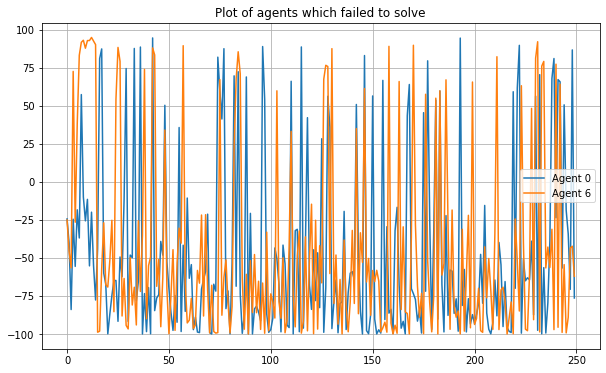

In [98]:
for agent_id in not_solved_ddpg:
    ddpg_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
    )


Text(0, 0.5, 'AVERAGE REWARD')

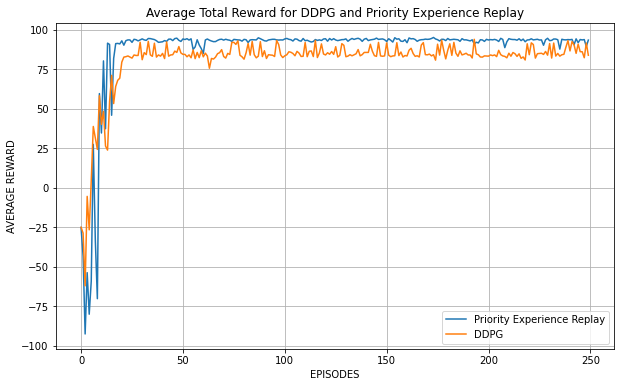

In [148]:
per_df['mean_total_reward'].plot(
    label="Priority Experience Replay",
    legend=True
)
ax = ddpg_df['mean_total_reward'].plot(
        figsize=figsize,
        grid = True,
        title="Average Total Reward for DDPG and Priority Experience Replay",
        label="DDPG",
        legend=True,
)

ax.set_xlabel("EPISODES")
ax.set_ylabel("AVERAGE REWARD")